Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY 7** | **Performing Face Recognition**
**Name** | Marquez, Keith Leigh Zhen R.
**Section** | CPE32S3
**Date Performed**: |02/19/2025
**Date Submitted**: |02/21/2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

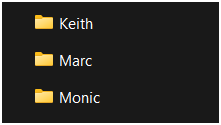

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [1]:
pip install opencv-python numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [6]:
import numpy as np
import os
import cv2

def read_images(dataset_path):
    images, labels = [], []
    person_id = 0

    for person_name in sorted(os.listdir(dataset_path)):
        person_folder = os.path.join(dataset_path, person_name)
        if not os.path.isdir(person_folder):
            continue

        for image_file in os.listdir(person_folder):
            image_path = os.path.join(person_folder, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) 

            if image is None:
                print(f"Could not read {image_path}, skipping.")
                continue

            image = cv2.resize(image, (200, 200))  
            images.append(np.asarray(image, dtype=np.uint8))
            labels.append(person_id)

        person_id += 1

    return np.array(images), np.array(labels)

if __name__ == "__main__":
    dataset_directory = r'C:\Users\Keith\Documents\Activity 7. Performing Face Recognition\images'
    face_images, face_labels = read_images(dataset_directory)

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

# EigenFace Recognition:

In [7]:
import numpy as np
import cv2
import sys
from read_images import read_images

def face_rec():
    names = ['Keith', 'Monic']  

    data_path = r'C:\Users\Keith\Documents\Activity 7. Performing Face Recognition\images'  
    face_images, face_labels = read_images(data_path)
    face_labels = np.asarray(face_labels, dtype=np.int32)

    recognizer = cv2.face.EigenFaceRecognizer_create()
    recognizer.train(face_images, face_labels)

    cam = cv2.VideoCapture(0) 
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    while True:
        ret, frame = cam.read()
        if not ret:
            break

        grayscale_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        detected_faces = face_detector.detectMultiScale(grayscale_frame, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in detected_faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            face_region = grayscale_frame[y:y + h, x:x + w]
            resized_face = cv2.resize(face_region, (200, 200))

            try:
                predicted_label, confidence = recognizer.predict(resized_face)
                recognized_name = names[predicted_label] if predicted_label < len(names) else "Unknown"
                cv2.putText(frame, f"{recognized_name}, {confidence:.2f}", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except:
                continue

        cv2.imshow("Eigen Face Recognition Procedure", frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    cam.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

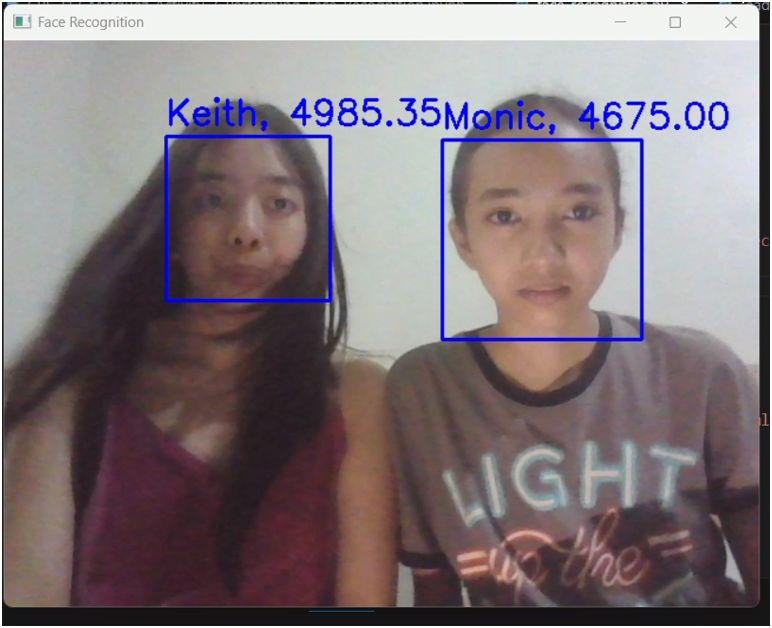

![Screenshot 2025-02-21 203154.png](<attachment:Screenshot 2025-02-21 203154.png>)
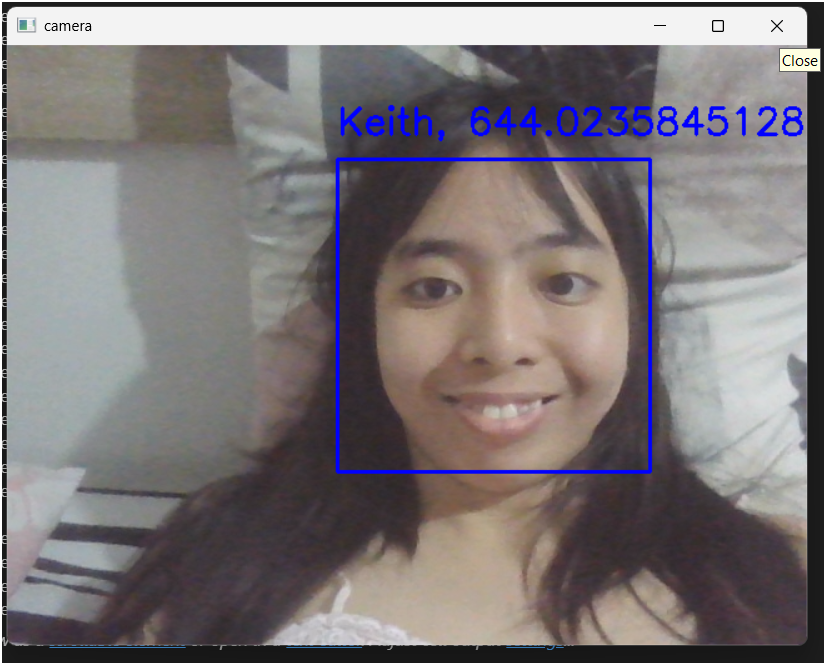

**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

- The program trains a face recognizer using stored images, then detects and identifies faces in real-time via a webcam. Recognized faces display a name and confidence score, while unrecognized ones are labeled "Unknown." The system runs until the user exits. Installing cv2 and other dependencies are the problems I've encountered through this I able to troubleshoot it by researhing what to do and then installing what I need to install

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

# FisherFace Recognition

In [8]:
import numpy as np
import cv2
import sys
from read_images import read_images

def face_rec():
    names = ['Keith', 'Monic']  

    data_path = r'C:\Users\Keith\Documents\Activity 7. Performing Face Recognition\images'  
    face_images, face_labels = read_images(data_path)
    face_labels = np.asarray(face_labels, dtype=np.int32)

    recognizer = cv2.face.FisherFaceRecognizer_create()
    recognizer.train(face_images, face_labels)

    cam = cv2.VideoCapture(0) 
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    while True:
        ret, frame = cam.read()
        if not ret:
            break

        grayscale_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        detected_faces = face_detector.detectMultiScale(grayscale_frame, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in detected_faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            face_region = grayscale_frame[y:y + h, x:x + w]
            resized_face = cv2.resize(face_region, (200, 200))

            try:
                predicted_label, confidence = recognizer.predict(resized_face)
                recognized_name = names[predicted_label] if predicted_label < len(names) else "Unknown"
                cv2.putText(frame, f"{recognized_name}, {confidence:.2f}", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except:
                continue

        cv2.imshow("Fisher Face Recognition Procedure", frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    cam.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

![Screenshot 2025-02-23 202553.png](<attachment:Screenshot 2025-02-23 202553.png>)
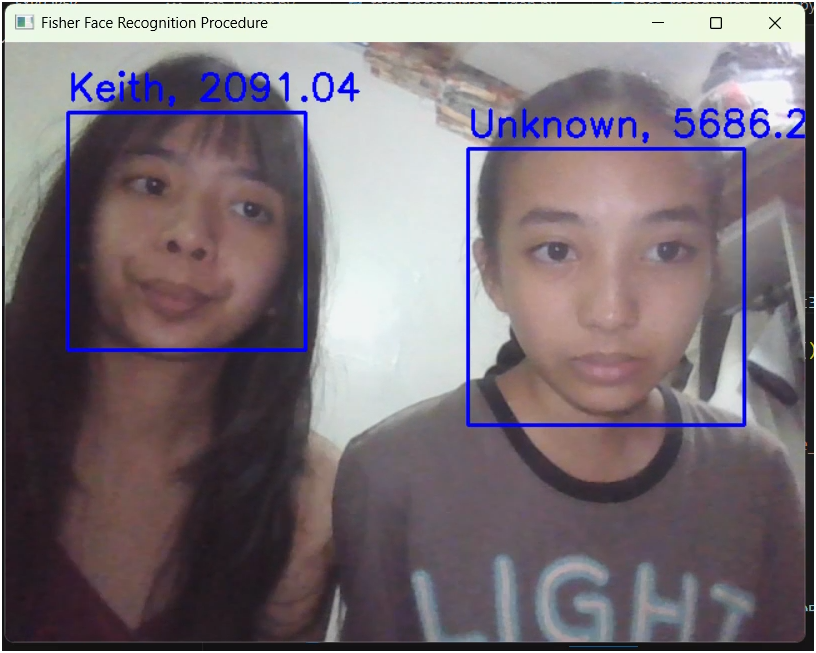

# LBPH Face Recognition

In [9]:
import numpy as np
import cv2
import sys
from read_images import read_images

def face_rec():
    names = ['Keith', 'Monic']  

    data_path = r'C:\Users\Keith\Documents\Activity 7. Performing Face Recognition\images'  
    face_images, face_labels = read_images(data_path)
    face_labels = np.asarray(face_labels, dtype=np.int32)

    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.train(face_images, face_labels)

    cam = cv2.VideoCapture(0) 
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    while True:
        ret, frame = cam.read()
        if not ret:
            break

        grayscale_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        detected_faces = face_detector.detectMultiScale(grayscale_frame, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in detected_faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            face_region = grayscale_frame[y:y + h, x:x + w]
            resized_face = cv2.resize(face_region, (200, 200))

            try:
                predicted_label, confidence = recognizer.predict(resized_face)
                recognized_name = names[predicted_label] if predicted_label < len(names) else "Unknown"
                cv2.putText(frame, f"{recognized_name}, {confidence:.2f}", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except:
                continue

        cv2.imshow("LBPH Face Recognition Procedure", frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    cam.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

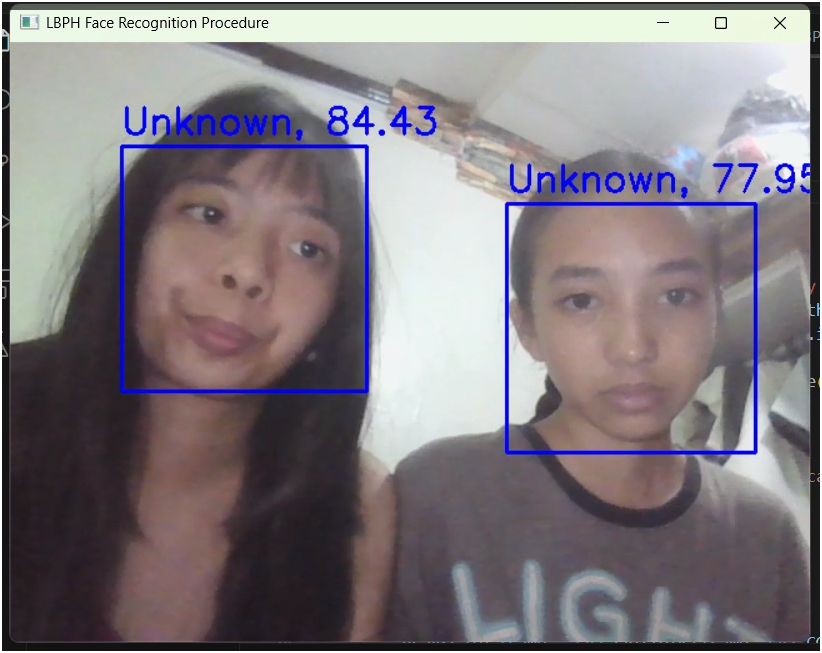

![Screenshot 2025-02-23 135712.png](<attachment:Screenshot 2025-02-23 135712.png>)
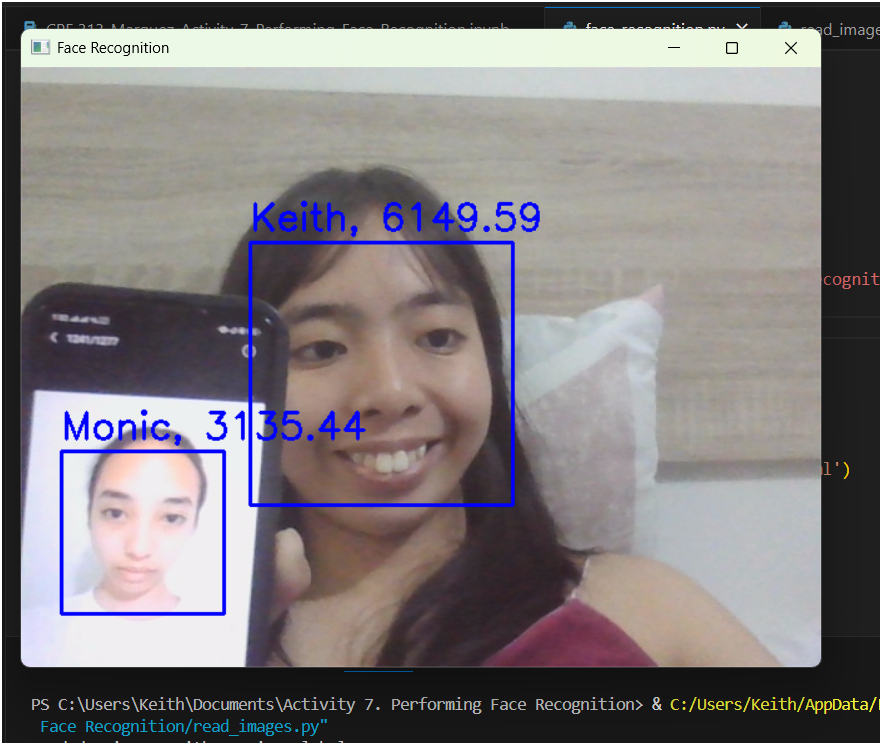

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

- The predict() method returns a predicted label (identity) and a confidence score (match accuracy). A lower confidence score means a better match. The label identifies the person, while the score helps assess recognition accuracy and filter incorrect matches.

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

In [ ]:
import numpy as np
import cv2
import sys
from read_images import read_images

def face_rec():
    names = ['Keith', 'Marc', 'Monic']  

    data_path = r'C:\Users\Keith\Documents\Activity 7. Performing Face Recognition\images'  
    face_images, face_labels = read_images(data_path)
    face_labels = np.asarray(face_labels, dtype=np.int32)

    recognizer = cv2.face.EigenFaceRecognizer_create()
    recognizer.train(face_images, face_labels)

    cam = cv2.VideoCapture(0) 
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    while True:
        ret, frame = cam.read()
        if not ret:
            break

        grayscale_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        detected_faces = face_detector.detectMultiScale(grayscale_frame, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in detected_faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            face_region = grayscale_frame[y:y + h, x:x + w]
            resized_face = cv2.resize(face_region, (200, 200))

            try:
                predicted_label, confidence = recognizer.predict(resized_face)
                recognized_name = names[predicted_label] if predicted_label < len(names) else "Unknown"
                cv2.putText(frame, f"{recognized_name}, {confidence:.2f}", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except:
                continue

        cv2.imshow("Eigen Face Recognition", frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    cam.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()


In [ ]:
import numpy as np
import cv2
import sys
from read_images import read_images

def face_rec():
    names = ['Keith', 'Marc', 'Monic']  

    data_path = r'C:\Users\Keith\Documents\Activity 7. Performing Face Recognition\images'  
    face_images, face_labels = read_images(data_path)
    face_labels = np.asarray(face_labels, dtype=np.int32)

    recognizer = cv2.face.FisherFaceRecognizer_create()
    recognizer.train(face_images, face_labels)

    cam = cv2.VideoCapture(0) 
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    while True:
        ret, frame = cam.read()
        if not ret:
            break

        grayscale_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        detected_faces = face_detector.detectMultiScale(grayscale_frame, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in detected_faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            face_region = grayscale_frame[y:y + h, x:x + w]
            resized_face = cv2.resize(face_region, (200, 200))

            try:
                predicted_label, confidence = recognizer.predict(resized_face)
                recognized_name = names[predicted_label] if predicted_label < len(names) else "Unknown"
                cv2.putText(frame, f"{recognized_name}, {confidence:.2f}", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except:
                continue

        cv2.imshow("Fisher Face Recognition", frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    cam.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

In [ ]:
import numpy as np
import cv2
import sys
from read_images import read_images

def face_rec():
    names = ['Keith', 'Marc', 'Monic']  

    data_path = r'C:\Users\Keith\Documents\Activity 7. Performing Face Recognition\images'  
    face_images, face_labels = read_images(data_path)
    face_labels = np.asarray(face_labels, dtype=np.int32)

    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.train(face_images, face_labels)

    cam = cv2.VideoCapture(0) 
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    while True:
        ret, frame = cam.read()
        if not ret:
            break

        grayscale_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        detected_faces = face_detector.detectMultiScale(grayscale_frame, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in detected_faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            face_region = grayscale_frame[y:y + h, x:x + w]
            resized_face = cv2.resize(face_region, (200, 200))

            try:
                predicted_label, confidence = recognizer.predict(resized_face)
                recognized_name = names[predicted_label] if predicted_label < len(names) else "Unknown"
                cv2.putText(frame, f"{recognized_name}, {confidence:.2f}", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except:
                continue

        cv2.imshow("LBPH Face Recognition", frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    cam.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

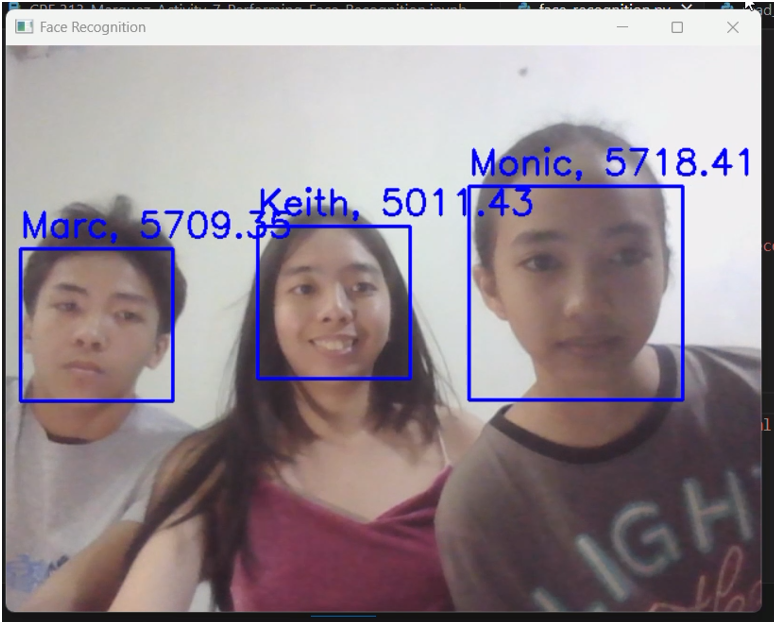

(some results are in the video)

Observations:

Eigenface Recognition – It can recognize faces easily but struggles when multiple faces are in the dataset, leading to misidentifications.

Fisherface Recognition – Similar to Eigenface, it sometimes recognizes the wrong person, especially with similar-looking faces.

Local Binary Pattern Histograms (LBPH) Recognition – The most challenging method, as it struggles in all aspects of face recognition.

## 5. Summary, Conclusions and Lessons Learned

At first, setting up the project was frustrating, especially when installing cv2 and other dependencies, as I encountered several issues before getting it to run properly. When I finally executed the face recognition program, it kept labeling me as "Unknown," which made me doubt whether I had trained it correctly. I tried multiple times, adjusting the training data and testing different conditions, until it finally detected faces and started recognizing them with confidence scores. However, I noticed that the system still had flaws sometimes it wouldn’t detect my face or my sibling’s, especially under poor lighting or certain angles. This experience taught me that face recognition models rely heavily on good training data and proper preprocessing, and even then, traditional methods like Eigenfaces have limitations. While it was rewarding to see progress after much trial and error, I realized that more advanced techniques might provide better accuracy and reliability in real-world applications.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*